# AN OVERVIEW OF THE NUMPY.RANDOM PACKAGE IN PYTHON

<hr style="border:2px solid black"> </hr>

## INTRODUCTION
<hr style="border:2px solid gray"> </hr>

This notebook contains a detail overview of the *numpy.random* package in python. It is explained how to use the package, but it also includes a detailed explanations of simple random data, permutations and some of the distributions provided for in the package. The aim of this notebook is to simplify the mentioned module explanation given on the [Official NumPy Manual website](https://numpy.org/doc/stable/reference/random/index.html).

### CONTENTS
***
- [NUMPY](#NUMPY)
    - [INSTALLATION](#INSTALLATION)
    - [IMPORT](#IMPORT)
- [NUMPY.RANDOM](#NUMPY.RANDOM)
    - [SIMPLE RANDOM DATA](#SIMPLE_RANDOM_DATA)
        - [integers](#integers)
        - [random](#random)
        - [choice](#choice)
        - [bytes](#bytes)
    - [PERMUTATIONS](#PERMUTATIONS)
    - [DISTRIBUTIONS](#DISTRIBUTIONS)
        - [1](#1)
        - [2](#2)
        - [3](#3)
        - [4](#4)
        - [5](#5)
    - [SEEDS](#SEEDS)
- [CONCLUSION](#CONCLUSION)
- [REFERENCES](#REFERENCES)


## NUMPY
<hr style="border:2px solid gray"> </hr>

NumPy stands for Numerical Python and it is a core scientific computing library in Python. [1]. It is a provision for huge, multi-dimensional arrays and matrices, alongside an extra-large collection of high-level mathematical functions to work on these arrays.[2] It was created in 2005 by Travis Oliphant. It is an open source project, and the source code for NumPy is located at this github repository https://github.com/numpy/numpy. [3] 

### INSTALLATION
***
There are multiple ways to have *NumPy* library installed on your system, but the easiest way is to use a python distribution that already has NumPy installed - e.g. Anaconda. (https://docs.anaconda.com/anaconda/install/index.html)

### IMPORT
***
Numpy library is imported same as any other python library, using *import* command at the start of the program. Numpy is usually imported using *np* alias, which is used later in the program when reffering to the package.

In [1]:
import numpy as np

## NUMPY.RANDOM
<hr style="border:2px solid gray"> </hr>

The *random* is a module present in the NumPy library. This module contains the functions which are used for generating random numbers. [4] Random number does not mean a different number every time. Random means something that can not be predicted logically. [6] *Random* module is based on pseudo-random number generation that means it is a mathematical way that generates a sequence of nearly random numbers. It is a combination of a bit generator and a generator. In Python, the random values are produced by the generator and originate in a Bit generator.[5]

```
numpy.random.default_rng()
```
Construct a new Generator with the default BitGenerator

In [2]:
import matplotlib.pyplot as plt

In [3]:
rng = np.random.default_rng()

### SIMPLE RANDOM DATA <a id='SIMPLE_RANDOM_DATA'></a>
***
#### [**integers**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) (low, high=None, size=None, dtype=np.int64, endpoint=False) 

Returns random integers in the specified range. ***low*** refers to the start of the range and it's inclusive. ***high*** is the end of the range and is by the default exclusive (end of range = *high* - 1). To inlcude *high* in the range, ***endpoint*** (*False* by default) has to be set up as *True*. If *high* is not specified then *low* is used as the end of the range. ***size*** defines the shape of the output and it can be one or multi-dimensional. ***dtype*** defines the dtype of the output, and it is *np.int64* by default. *Integers* returns radnom integers in "discrete uniform" distribution. A discrete uniform distribution is a statistical distribution where the probability of outcomes is equally likely and with finite values. [7]

<br>

Image 1. Array shape
<center><img src="https://i.stack.imgur.com/NWTQH.png" width="500"/></center>

##### EXAMPLES:
***

In [4]:
x_int = (rng.integers(10, 100, size=10000 , endpoint = True))
print (x_int)

[41 23 10 ... 44 66 52]


(array([1008.,  984., 1022.,  994.,  967.,  975., 1026., 1018.,  985.,
        1021.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

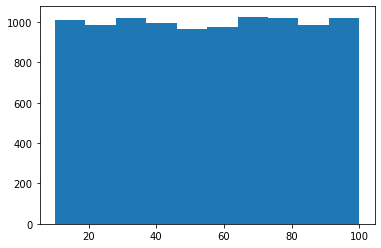

In [5]:
plt.hist(x_int)

The return in this example is 10000 random numbers between 10 and 100 (both inclusive). The return is a one dimensional array. The plot shows the distribution is uniformed - there are approx. 1000 of each generated number.
Below are a few more examples.

***

In [6]:
rng.integers(5, size=10)

array([3, 1, 2, 1, 1, 2, 3, 1, 0, 4], dtype=int64)

***

In [7]:
rng.integers(5, size=10, endpoint = True)

array([2, 2, 4, 2, 2, 1, 0, 0, 4, 4], dtype=int64)

***

In [8]:
rng.integers(5, size=(3, 10))

array([[1, 4, 1, 0, 3, 2, 1, 4, 1, 3],
       [0, 3, 2, 0, 2, 3, 3, 2, 4, 4],
       [0, 4, 3, 2, 3, 3, 0, 3, 4, 3]], dtype=int64)

***

In [9]:
rng.integers(5, size=(2, 3, 2))

array([[[3, 1],
        [2, 2],
        [2, 1]],

       [[0, 0],
        [2, 0],
        [1, 4]]], dtype=int64)

***

In [10]:
rng.integers(1, [10, 50, 100])

array([ 3, 21, 77], dtype=int64)

***

In [11]:
rng.integers([1, 50, 90], 100)

array([98, 74, 91], dtype=int64)

***

#### [**random**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)(size=None, dtype=np.float64, out=None)

Returns random floats in the interval higher or equal to 0.0 and less then 1.0. This interval is called half-open interval, where one of the endpoints are inclusive. ***size*** defines the output shape, which, if not specified, is none - single value is returned. ***dtype*** defines the dtype of the output and is *np.float64* by the default. Only *float64* and *float32* are supported. ***out*** ??
*return* module can also be used for custom half-open intervals, e.g. if we want the output of a radnom float between a and b, we can do the following:
> (b - a) * random() + a

The outputs are from the “continuous uniform” distribution. A continuous uniform distribution (also referred to as rectangular distribution) is a statistical distribution with an infinite number of equally likely measurable values.[7]

##### EXAMPLES:
***

In [12]:
x_rand = (rng.random(10000))
print (x_rand)

[0.28634889 0.20651289 0.2308633  ... 0.03898246 0.97706844 0.92824852]


(array([ 967., 1028., 1026., 1018., 1015., 1014.,  968.,  980.,  987.,
         997.]),
 array([1.54578426e-04, 1.00131521e-01, 2.00108463e-01, 3.00085405e-01,
        4.00062348e-01, 5.00039290e-01, 6.00016232e-01, 6.99993175e-01,
        7.99970117e-01, 8.99947059e-01, 9.99924001e-01]),
 <BarContainer object of 10 artists>)

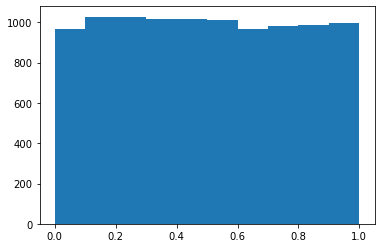

In [13]:
plt.hist(x_rand)

The return in this example are 10000 random floats in the half-open interval 0.0 to 1.0 (exclusive). The distribution of these floats is uniformed - there are approx. 1000 numbers in each group (e.g 0.0 - 0.1 ~ 0.4 - 0.5). Below are a few more examples of *random* module. 

***

In [14]:
rng.random()

0.5580763694781262

***

In [15]:
rng.random([2,3])

array([[0.96782891, 0.35216597, 0.95820277],
       [0.44377707, 0.39961791, 0.28451352]])

***

In [16]:
(100-50) * rng.random((3, 2)) + 50

array([[83.14673369, 97.53005597],
       [50.85559891, 73.05038368],
       [77.26687653, 81.84974739]])

***

ONE WITH out

***

#### [**choice**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice) (a, size=None, replace=True, p=None, axis=0, shuffle=True)

Generates a random sample from a given array. ***a*** sets the range from which the radnom sample gets generated. If *a* is an ndarray, the output is random selection of the elements of that array. If *a* is an integer, the output is random selection of a range from 0 - given integer (exclusive). ***size*** defines the shape of the output. It is *None* by default. If *a* has more than one dimension, the size shape will be inserted into the axis dimension. ***replace*** defines if the return will have repeated elements. It is *True* by default, meaning that a value of *a* can be selected multiple times. ***p*** is the probability of the entries in *a* to be selected. By default it is *None*, meaning the probibility is equal for all - uniform distribution. ***axis*** is axis along which the selection is performed, and is *0* by default. ***shuffle*** defines if the output is shuffled when sampling without replacement. Default is *True*.

<br>

Image 1. Axis
<center><img src="https://i.stack.imgur.com/dcoE3.jpg" width="500"/></center>

##### EXAMPLES:
***

In [17]:
x_ch = (rng.choice(10,10000))
print (x_ch)

[4 3 1 ... 0 3 1]


(array([1020.,  960.,  956., 1010.,  972., 1045., 1001., 1013., 1024.,
         999.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

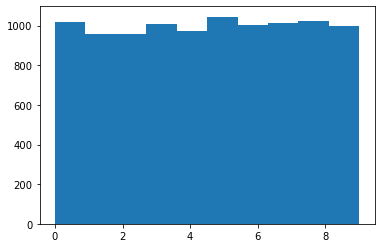

In [18]:
plt.hist (x_ch)

The return in this example are 10000 random numbers in the range 0-10 (exclusive). The distribution is uniformed, because *p* hasn't been set up - it is *0*. 

***

In [19]:
x1_ch = (rng.choice([1,3,5,7], 10000, p=[0.1, 0.5, 0.25, 0.15]))
print (x1_ch)

[5 5 3 ... 1 3 3]


(array([1048.,    0.,    0., 4946.,    0.,    0., 2555.,    0.,    0.,
        1451.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

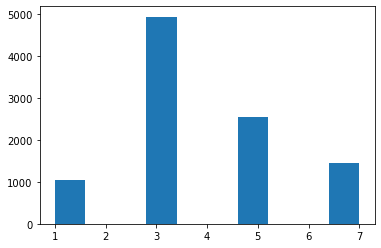

In [20]:
plt.hist (x1_ch)

The return in this example are 10000 random numbers selected from the defined array [1,3,5,7]. The probibility to select the numbers *p* has been defined and it's shown in the plot.

***

In [21]:
rng.choice (100)

21

***

In [22]:
rng.choice(5, 10)

array([4, 4, 4, 1, 2, 3, 0, 0, 0, 3], dtype=int64)

***

In [23]:
rng.choice(10,10, replace=False)

array([2, 4, 5, 7, 1, 3, 8, 9, 0, 6], dtype=int64)

***

In [24]:
rng.choice([[0, 1, 2], [3, 4, 5], [6, 7, 8]], 4, replace=True)

array([[3, 4, 5],
       [6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

In [25]:
colors = ['red', 'blue', 'yellow', 'black']
rng.choice(colors, 10, p=[0.5, 0.1, 0.1, 0.3])

array(['red', 'black', 'blue', 'red', 'black', 'red', 'black', 'blue',
       'red', 'black'], dtype='<U6')

In [26]:
rng.choice ([[1,2,3], [10,20,30], [100,200,300]],5, axis = 0)

array([[ 10,  20,  30],
       [  1,   2,   3],
       [ 10,  20,  30],
       [100, 200, 300],
       [  1,   2,   3]])

In [27]:
rng.choice ([[1,2,3], [10,20,30], [100,200,300]],5, axis = 1)

array([[  2,   2,   1,   2,   3],
       [ 20,  20,  10,  20,  30],
       [200, 200, 100, 200, 300]])

In [28]:
rng.choice (10,10, replace = False, shuffle = True)

array([7, 6, 0, 1, 4, 9, 8, 5, 3, 2], dtype=int64)

In [29]:
rng.choice (10,10, replace = False, shuffle = False)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

***

#### [**bytes**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes) (length)

Genarates random bytes. The number of bytes 

##### EXAMPLES:
***

In [30]:
rng.bytes(1)

b'~'

In [31]:
rng.bytes(20)

b'\xdd\xba\xbf\xa3\x85\x9e\xc5ZTBR\xd9\x01S\xde"%\xe5]\x00'

***

### PERMUTATIONS

***

### DISTRIBUTIONS

#### Distribution 1 

#### Distribution 2

#### Distribution 3

#### Distribution 4

#### Distribution 5

### SEEDS

## CONCLUSION
***

## REFERENCES

- [1] https://towardsdatascience.com/getting-started-with-numpy-59b22df56729
- [2] https://python.plainenglish.io/what-are-basics-of-numpy-2afa9a9455cb
- [3] https://www.w3schools.com/python/numpy/numpy_intro.asp
- [4] https://www.javatpoint.com/numpy-random
- [5] https://pythonguides.com/python-numpy-random/
- [6] https://www.w3schools.com/python/numpy/numpy_random.asp
- [7] https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/

## Links to check


- https://numpy.org/doc/stable/reference/random/index.html
- https://www.w3schools.com/python/numpy/numpy_random.asp
- https://www.geeksforgeeks.org/random-sampling-in-numpy-random-function/
- https://www.javatpoint.com/numpy-random
- https://pythonguides.com/python-numpy-random/
- https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generator.html
- https://en.wikipedia.org/wiki/Discrete_uniform_distribution
- https://en.wikipedia.org/wiki/Continuous_uniform_distribution
- https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown